# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
! pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cedar city
Processing Record 2 of Set 1 | mehamn
Processing Record 3 of Set 1 | natal
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | revda
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | bud
Processing Record 11 of Set 1 | vysha
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | komsomolskiy
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | jalalabad
Processing Record 17 of Set 1 | naryan-mar
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | fairbanks
Processing Record 20 of Set 1 | port hedland
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | hokitika
Processing Record 23 of Set 1 | luderitz
Process

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cedar city,37.6775,-113.0619,13.54,35,100,7.20,US,1681404862
1,mehamn,71.0357,27.8492,1.97,69,0,7.20,NO,1681404862
2,natal,-5.7950,-35.2094,29.36,70,40,8.23,BR,1681404240
3,ilulissat,69.2167,-51.1000,-2.99,93,40,2.06,GL,1681404595
4,busselton,-33.6500,115.3333,11.62,76,85,9.08,AU,1681404863


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cedar city,37.6775,-113.0619,13.54,35,100,7.20,US,1681404862
1,mehamn,71.0357,27.8492,1.97,69,0,7.20,NO,1681404862
2,natal,-5.7950,-35.2094,29.36,70,40,8.23,BR,1681404240
3,ilulissat,69.2167,-51.1000,-2.99,93,40,2.06,GL,1681404595
4,busselton,-33.6500,115.3333,11.62,76,85,9.08,AU,1681404863


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

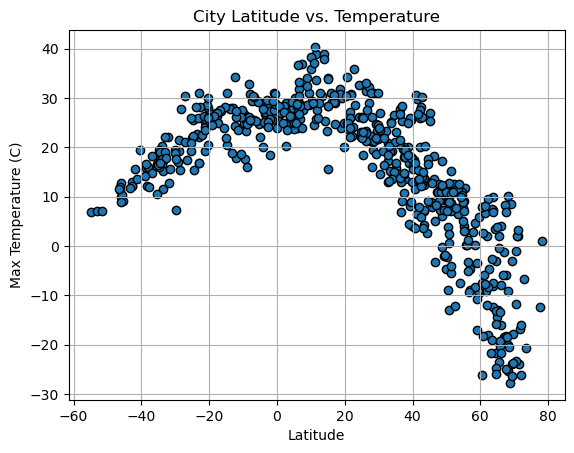

In [25]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values,y_values, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

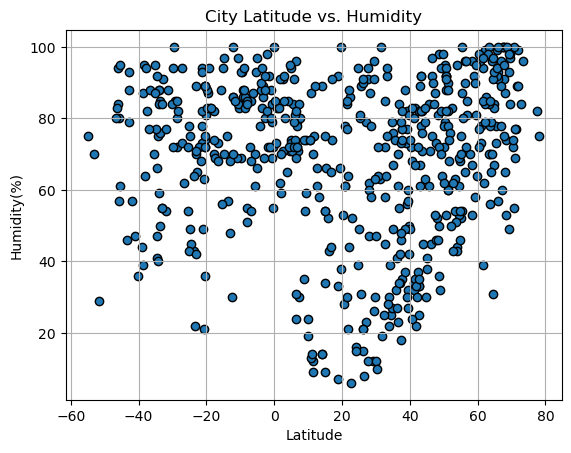

In [26]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values,y_values, marker="o", edgecolors='black')

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

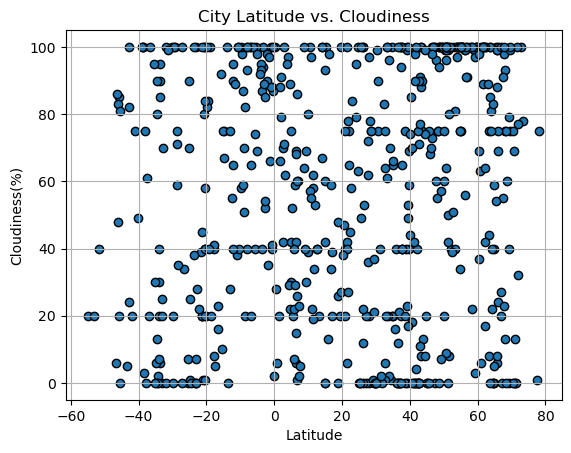

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values,y_values,marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

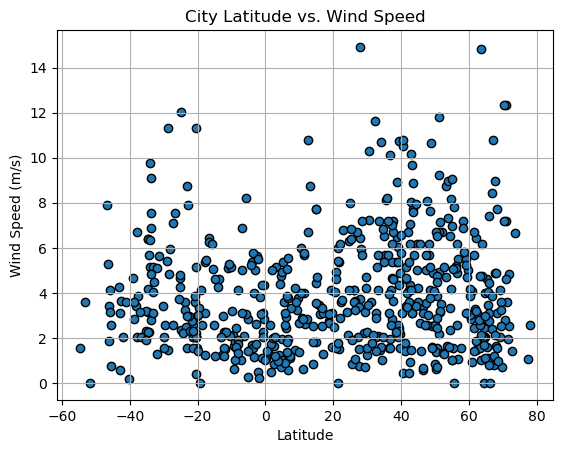

In [28]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values,y_values,marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
regress_values = (x_values*slope) + intercept 

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cedar city,37.6775,-113.0619,13.54,35,100,7.20,US,1681404862
1,mehamn,71.0357,27.8492,1.97,69,0,7.20,NO,1681404862
3,ilulissat,69.2167,-51.1000,-2.99,93,40,2.06,GL,1681404595
5,revda,56.8010,59.9303,-4.74,81,100,5.51,RU,1681404863
6,tasiilaq,65.6145,-37.6368,2.09,91,99,1.11,GL,1681404863


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,natal,-5.7950,-35.2094,29.36,70,40,8.23,BR,1681404240
4,busselton,-33.6500,115.3333,11.62,76,85,9.08,AU,1681404863
8,hobart,-42.8794,147.3294,12.25,93,100,3.09,AU,1681404864
11,rikitea,-23.1203,-134.9692,22.13,89,100,1.55,PF,1681404864
12,atuona,-9.8000,-139.0333,26.81,69,58,3.19,PF,1681404865


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 2.1189091464277785e-113
y=-0.66x + 38.76


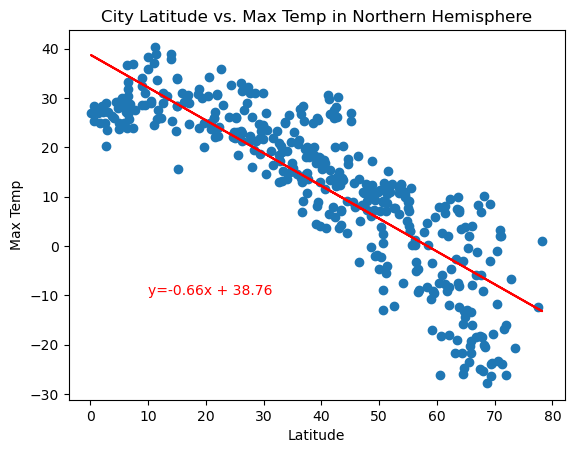

In [37]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (10,-10), c="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp in Northern Hemisphere")

plt.show()


The r-value is: 3.7157800634639644e-39
y=0.36x + 29.64


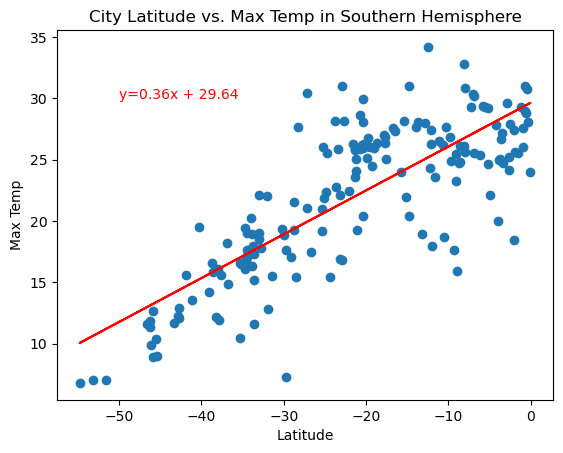

In [30]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (-50,30), c="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp in Southern Hemisphere")

plt.show()

## Discussion about the linear relationship:

### Humidity vs. Latitude Linear Regression Plot

- As latitude of cities increases going north the max temperature decreases accordingly. In this case, the extremely small rvalue indicates that there is a very strong negative correlation between the latitude and temperature in the linear regression model. Specifically, as the latitude increases, maximum temperature decreases at a very strong rate. 

- In the Southern Hemisphere, there is a positive correlation between latitude and max temperature. As one moves closer to the equator the max temperature rises, and vise versa. The rvalue is extremely small and suggests there is a strong positive correlation between x and y values. 

The r-value is: 1.6226634887421e-08
y=0.33x + 53.18


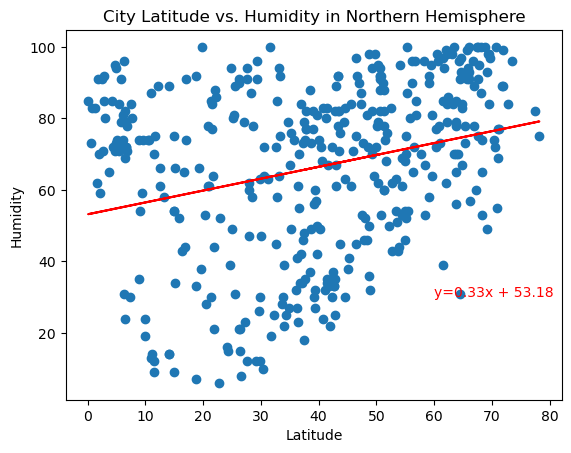

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (60,30), c="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity in Northern Hemisphere")

plt.show()

The r-value is: 0.009645656313877796
y=0.24x + 79.92


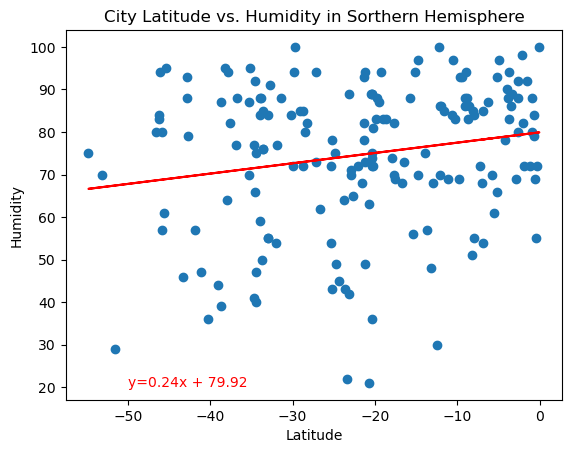

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (-50,20), c="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity in Sorthern Hemisphere")

plt.show()

**Discussion about the linear relationship:**

In the Northern Hemisphere, it can be seen that there is a relatively strong positive correlation between latitude and humidity. As latitude increases traveling north, humidity also seems to rise. 

In the Southern Hemisphere, the values seem a bit more dispersed compared to the measurements of the Northern Hemisphere. However, there is a weak positive correlation between the two variables as reflected by the rvalue. The line of best fit also shows that as latitude goes closer to the equator humidity increases slightly more. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0013680384221332025
y=0.29x + 44.37


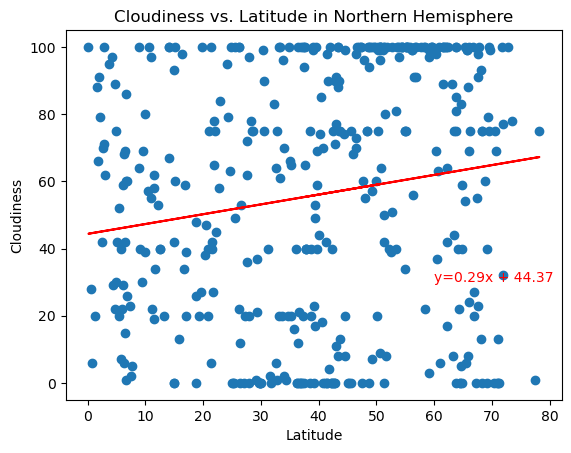

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (60,30), c="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude in Northern Hemisphere")

plt.show()

The r-value is: 0.00011686809024869996
y=0.76x + 71.84


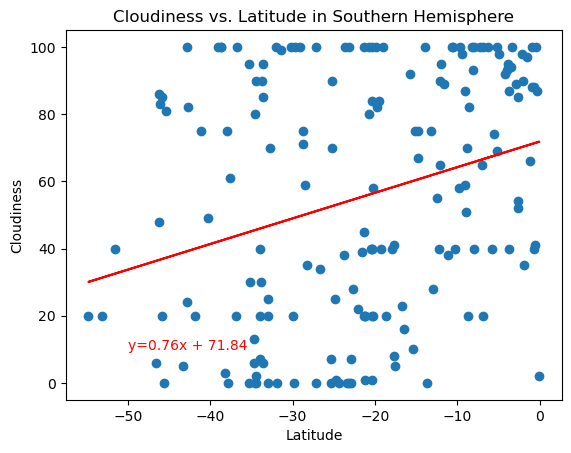

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (-50,10), c="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude in Southern Hemisphere")

plt.show()

**Discussion about the linear relationship:**

Both graphs show a very weak positive correlation between latitude and cloudiness. Traveling north demonstrates a slight increase in cloudiness as seen in the line of best fit. However, much of data is dispersed and cloudiness may be affected by other variables. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.021996064677093256
y=0.01x + 3.45


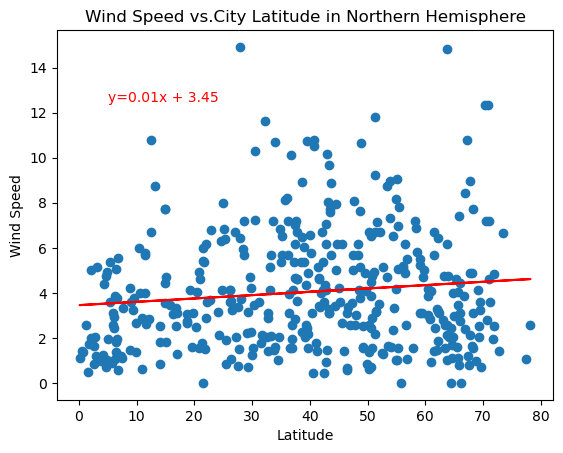

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (5,12.5), c="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs.City Latitude in Northern Hemisphere")

plt.show()

The r-value is: 0.05817540299449485
y=-0.02x + 3.01


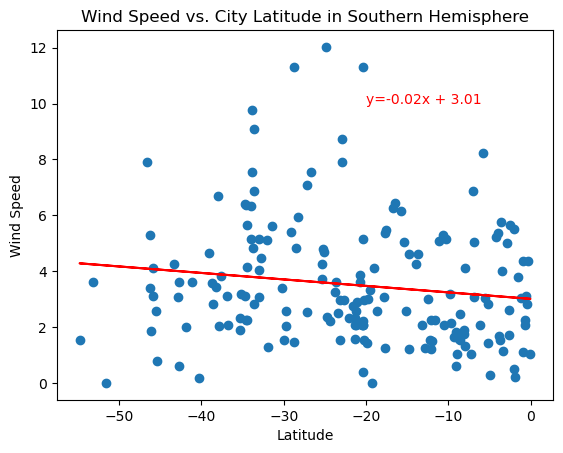

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, pvalue, rvalue, stderr)=linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
line_eq=f'y={str(round(slope, 2))}x + {str(round(intercept,2))}'
print(line_eq)

regress_values = (x_values*slope) + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, color ='red')

plt.annotate(line_eq, (-20,10), c="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. City Latitude in Southern Hemisphere")

plt.show()

**Discussion about the linear relationship:** 

Wind speed in the northern and southern hemispheres are weakly affected by latitude. The r-value is very small and indicates a weak correlation between wind speed and latitude. In the north there is a weak positive correlation and in the south there is a weak negative correlation with latitude. 